# In-class exercise for tutorial012
# Loops!

## Introduction

All of what we think of as "statistics" is based upon repeating an experiment an infinite number of times. But rather than actually repeating the experiment, a bunch of calculus is used, plus assumptions to get the math to work. It may not seem obvious, but when we have been doing something as simple as compute the width of a sampling distribution from a set of data as *s/sqrt(n)*, what we are really saying is:

"If we were to do this experiment an infinite number of times and make a distribution of the means from all the experiments, it would be a normal distribution and have a standard deviation of s/sqrt(n). (And, by the way, this formula is based on a bunch of math that we will never actually do!)"

One of the most important breakthroughs in statistics and data science was the realization that, with the repetition of a few simple operations (using computers), we can actually simulate experiments a "very large" number of times. And while it's true that "very large" is less then infinite, by using computers to repeat experiments many many times (say tenths of thousands), we free ourselves of the assumptions that had to made in order to get the math underlying traditional statistics to work!

But how would we simulate repeating an experiment a number of times over in code?

You guessed it... **with a `for` loop!**

---

### Load the data set

The data come from an online test of anxiety that – according to the sketchy website – was constructed such that the anxiety scores are **normally distributed** with a **mean of 50** and a **standard deviation of 10**.

Preliminaries of course...

In [70]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Load the data file "datasets/012_anxiety_data.npy" (assuming you put the file in your "datasets" folder – otherwise adjust path as necessary. Reminder: `np.load()` is your friend!

In [71]:
data_anxiety = np.load('../datasets/012_anxiety_data.npy')

Now let's make sure we know our data set, `real_data`, well. Let's 

* look at a histogram
* ditto with a kde
* compute the mean, median and standard deviation
* compute the standard error of the mean


Text(0.5, 6.79999999999999, 'Anxiety')

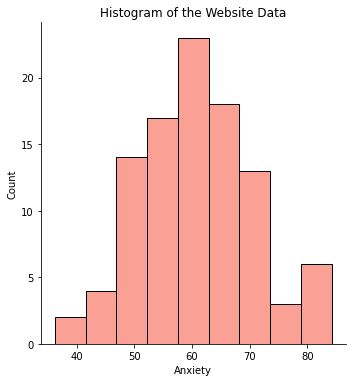

In [87]:
# histogram
sns.displot(data_anxiety, kind = 'hist', color = 'salmon')
plt.title("Histogram of the Website Data")
plt.xlabel("Anxiety")

Text(0.5, 0, 'Anxiety')

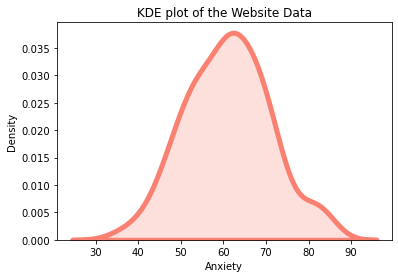

In [88]:
# kde
sns.kdeplot(data_anxiety, fill = True, color = 'salmon', lw = 5)
plt.title("KDE plot of the Website Data")
plt.xlabel("Anxiety")

In [74]:
# mean, median and standard deviation
the_mean = np.mean(data_anxiety) # mean of the data
the_median = np.median(data_anxiety) # median of the data
the_std = np.std(data_anxiety) # standard deviation of the data
print("Mean:" ,the_mean)
print("Median:", the_median)
print("Standard Deviation:", the_std)
data_anxiety.shape

Mean: 60.971860226088445
Median: 61.00404975776776
Standard Deviation: 9.789934489177513


(100,)

In [75]:
# standard error
standard_error = (the_std) / (np.sqrt(100)) # equation to use for standard error: s / sqrt(n)
print("Standard Error:", standard_error)

Standard Error: 0.9789934489177513


---

In a sentence or two of your own words, describe what the standard error of the mean is:

#### The standard error of the mean is the standard deviation of the sampling distribution of means. 

---

### Simulate a bunch of experimental replications

Imagine, we wanted to simulate many many repeates of the same experiments. Fpr examp,e imagine that we wanted to appreciate the variability of the data obtained in the experiments, under certain conditions of noise and variability in the data. 

How would we simulate a bunch of experiments? We obviously can't actually repeat the experiments in the real world. But, as data scientists, we do have a couple of options, both of which we can implement with `for` loops!

#### Monte Carlo Simulation

If we want to repeat the experment a bunch of times, let's consider what we know! We know that the website claims that:

* the scores are normally distributed
* they have a mean of 50
* and a standard deviation of 10

So we should be able to use `numpy.random.randn()` to generate numbers that meet the first critereon. Then we just have to scale the standard deviation up by 10 and set the mean to 50. Luckily, we know how to multiply (`*`) and add (`+`), respectively.

So here's our mission: 

* write a `for` loop that repeats `n_replications = 2000` times
* on each replication
    - compute the mean of the simulated experiment
    - store that mean in a `mc_means` numpy array
* do a histogram of the means
* make a kde also too
* compute the mean and standard deviation of the 2000 means
   - compare the "mean o' means" from your simulation with the data mean
   - compare the "standard deviation o' means" with the standard error of the data

The simulation via `for` loop:

In [76]:
n_experiments = 2000
avg_mean = 50 # mean from the website
avg_std = 10 # standard deviation of the website
mc_means = np.zeros((n_experiments, 1))  # creating the means array to store means from the simulations
for i in range(n_experiments):
    current_data = avg_mean + (avg_std * (np.random.randn(100,1)))
    current_mean = np.mean(current_data)
    mc_means[i] = current_mean
    
print(mc_means.shape)
    

(2000, 1)


Histogram of the means:

Text(0.5, 6.79999999999999, 'Simulated Means')

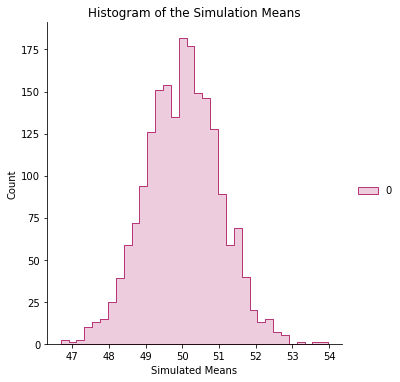

In [89]:
sns.displot(mc_means, kind = 'hist', palette = 'magma', element = 'step')
plt.title("Histogram of the Simulation Means")
plt.xlabel("Simulated Means")

KDE of the means

Text(0.5, 6.79999999999999, 'Simulated Means')

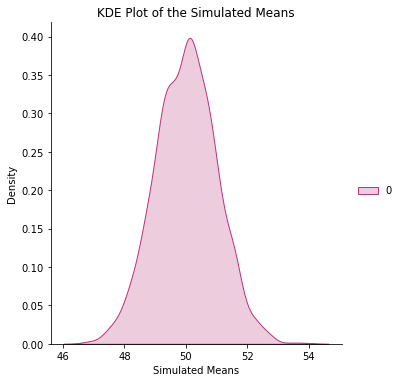

In [90]:
sns.displot(mc_means, kind = 'kde', palette = 'magma', fill = True)
plt.title("KDE Plot of the Simulated Means")
plt.xlabel("Simulated Means")

Compute the mean value of your simulation means:

In [91]:
simulated_mean = np.mean(mc_means)
print("Simulated Mean:", simulated_mean)

Simulated Mean: 50.00332292280623


Compare it with the original data mean:

#### Compared to the original mean, the simulated mean is very different. The original mean with 100 datapoints is around 60 while the simulated mean with 2000 replications of 100 datapoints is around 50. Due to this, we can say that the website is extremely incorrect in the means department as the means are almost 10 apart.

Compute the standard deviation of your simulation means:

In [92]:
simulated_std = np.std(mc_means)
print("Simulated Standard Deviation:", simulated_std)

Simulated Standard Deviation: 1.0015551452240954


Compare it with the standard error you computed from the original data:

#### The standard deviation of the simulation is almost equal to the standard error that was computed from the original data. The original data with 100 datapoints had a standard deviation around 1. SImilarly, the simulations with 2000 replications of 100 datapoints yielded something quite close to 1 as well. Due to this, we can estimate that the website had an accurate standard devaition compared to the original dataset

---

##### Bonus (not required)
If you knocked the above out with time to spare – congratulations – and let's think about this: you not only have the information given above as clues to the true state of the world. You also have:

* the data themselves (or the histogram thereof that you made)
* the actual mean of the original data
* the actual standard deviation of the original data

So rather than do a simulation based on the claimed mean of the sketchy website, you could base a new simulation on the data you actually have!

Note that, if you wrote you code reasonably well above, you should only have to change the values of two variables to do this new simulation!

Proceed!

Mean: 60.973698291856415
Standard Error: 0.9745920957581771


Text(0.5, 6.79999999999999, 'Simulated Means of the Original Data')

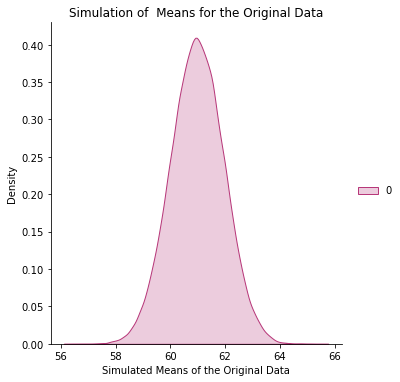

In [94]:
n_experiments = 100000
bonus_mean = the_mean
bonus_std = the_std
bonus_means = np.zeros((n_experiments, 1))
for i in range(n_experiments):
    current_data = bonus_mean + (bonus_std * (np.random.randn(100,1)))
    current_mean = np.mean(current_data)
    bonus_means[i] = current_mean

print("Mean:", np.mean(bonus_means))
print("Standard Error:", np.std(bonus_means))
sns.displot(bonus_means, kind = 'kde', palette = 'magma', fill = True)
plt.title("Simulation of  Means for the Original Data")
plt.xlabel("Simulated Means of the Original Data")